# Assignment no 4 ( Simple linear regression)

# Salary data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\rajes\Downloads\Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.isnull().sum()               #checking null values

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### To check the outliers in the data

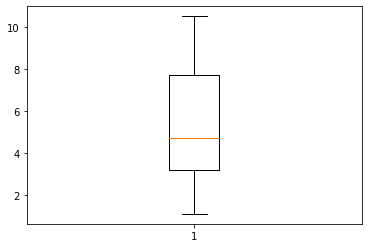

In [8]:
plt.boxplot(df['YearsExperience'])
plt.show()

Here we observe that there is no outlier in the data.

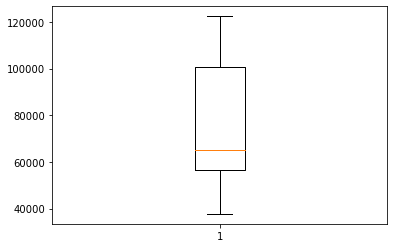

In [9]:
plt.boxplot(df['Salary'])
plt.show()

Here we observe that there is no outlier in the data.

In [10]:
import warnings
warnings.filterwarnings('ignore')

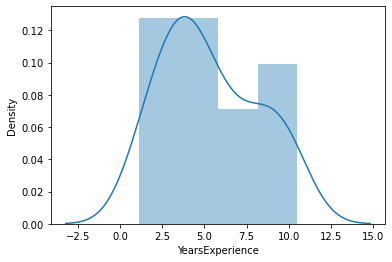

In [11]:
sns.distplot(df['YearsExperience'])
plt.show()

Plot shows that data is not normal

<AxesSubplot:xlabel='Salary', ylabel='Density'>

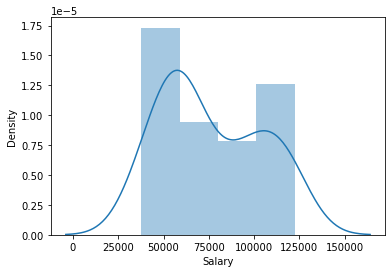

In [12]:
sns.distplot(df['Salary'])

Plot shows that data is not normal.

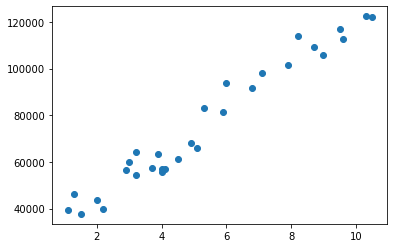

In [13]:
plt.scatter(df.YearsExperience,df.Salary)       # Scatter plot

#### Here we can say that data is correlated.

In [14]:
df.corr()                    # correlation between YearsExperience and Salary

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Regression model building

#### For preparing linear regression model we need to import the statsmodels.formula.api

In [15]:
import statsmodels.formula.api as smf

In [16]:
model=smf.ols("Salary~YearsExperience",data=df).fit()            # model fitting

In [17]:
print(model.params)             # For getting coefficients of the varibles used in equation

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Log Transformation

In [19]:
model1=smf.ols("Salary~np.log(YearsExperience)",data=df).fit()  #log transformation

In [20]:
print(model1.params)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64


In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        13:40:22   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
(model1.rsquared,model1.rsquared_adj)           # R squared value

(0.8538888828756969, 0.8486706286926861)

### Exponential Transformation

In [23]:
model2=smf.ols("np.log(Salary)~YearsExperience",data=df).fit() # exponential transformation

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        13:40:26   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
(model2.rsquared,model2.rsquared_adj)    #R-squared value

(0.9319671194084195, 0.9295373736730059)

### Quadratic Transformation

In [26]:
df["Yeexp_sq"]=df.YearsExperience*df.YearsExperience                         # quadratic model
model3=smf.ols("Salary~YearsExperience+Yeexp_sq",data=df).fit()

In [27]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           3.59e-19
Time:                        13:40:30   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience  9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
Yeexp_sq           16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
(model3.rsquared,model3.rsquared_adj)    #R-squared value

(0.956975168321065, 0.953788143752255)

### predictions for best fitted model

#### As from the above R-sq values we can observe that the simple linear model has the highest R-sq values. Hence, we will predict the values using simple linear model

In [29]:
pred = model.predict(pd.DataFrame(df['YearsExperience']))
pred.corr(df.Salary)

0.9782416184887601

In [30]:
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

### Scatter plot of Actual Values and lineplot of predicted values 

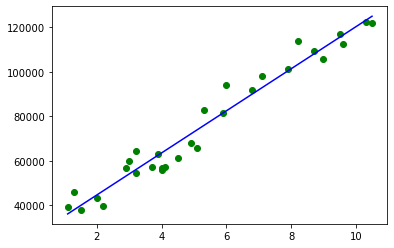

In [31]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='green');plt.plot(df['YearsExperience'],pred,color='blue')

# Delivery time dataset

In [44]:
data=pd.read_csv(r"\Users\rajes\Downloads\delivery_time.csv")

In [45]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [46]:
data.shape

(21, 2)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [48]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [49]:
data.isnull().sum()        
#check for missing values

Delivery_Time    0
Sorting_Time     0
dtype: int64

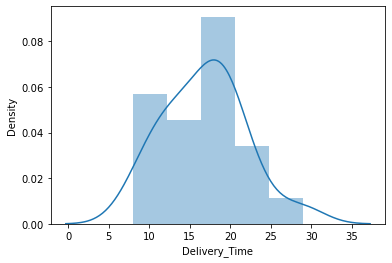

In [50]:
sns.distplot(data['Delivery_Time'])
plt.show()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

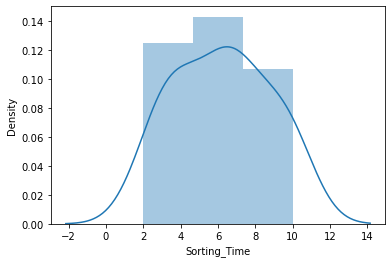

In [51]:
sns.distplot(data['Sorting_Time'])

#### Distplot shows that data is not normal

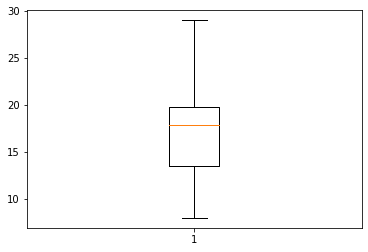

In [52]:
plt.boxplot(data['Delivery_Time'])
plt.show()

Here we observe that there is no outlier in the data.

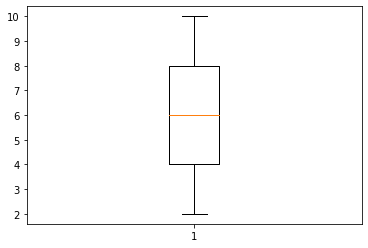

In [53]:
plt.boxplot(data['Sorting_Time'])
plt.show()

Here we observe that there is no outlier in the data.

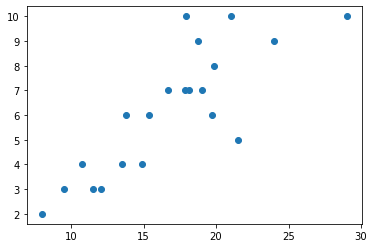

In [54]:
plt.scatter(data.Delivery_Time,data.Sorting_Time)

Here we observe that data is correlated.

In [55]:
data.corr()       #Correlation between Delivery time and Sorting time

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# Regression model building

### Linear Regression model

In [56]:
model_1=smf.ols("Delivery_Time~Sorting_Time",data=data).fit()        #model fitting

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

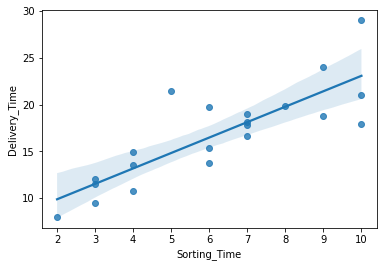

In [57]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)

In [58]:
model_1.params  # Coefficients

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [59]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        13:45:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#R squared values
(model_1.rsquared,model_1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Log Transformation

In [61]:
model_2=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=data).fit()

In [62]:
model_2.params     #Coefficients

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [63]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        13:45:05   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#R squared values
(model_2.rsquared,model_2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

### Exponential Transformation

In [65]:
model_3=smf.ols("np.log(Delivery_Time)~Sorting_Time",data=data).fit()

In [66]:
model_3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [67]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 08 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                           13:45:09   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#R squared values
(model_3.rsquared,model_3.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

### Quadratic Transformation

In [69]:
data["Sort_sq"]=data.Sorting_Time*data.Sorting_Time                            # quadratic model
model_4=smf.ols("Delivery_Time~Sorting_Time+Sort_sq",data=data).fit()

In [70]:
model_4.params

Intercept       3.522234
Sorting_Time    2.813002
Sort_sq        -0.093198
dtype: float64

In [71]:
 model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.39e-05
Time:                        13:45:12   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting_Time     2.8130      1.461      1.926      0.070      -0.256       5.882
Sort_sq         -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#R squared values
(model_4.rsquared,model_4.rsquared_adj)

(0.6934396274520247, 0.659377363835583)

#### Squarer root Transformation

In [73]:
import math
from math import sqrt

In [74]:
type(data.Sorting_Time)

pandas.core.series.Series

In [75]:
data["sq_sort"]=data["Sorting_Time"]**(0.5)

In [76]:
data.head()

,Delivery_Time,Sorting_Time,Sort_sq,sq_sort
0,21.00,10,100,3.162278
1,13.50,4,16,2.000000
2,19.75,6,36,2.449490
3,24.00,9,81,3.000000
4,29.00,10,100,3.162278


In [77]:
model_5=smf.ols("Delivery_Time~sq_sort",data=data).fit()

In [78]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.61e-06
Time:                        13:45:17   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sq_sort        7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#R squared values
(model_5.rsquared,model_5.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

#### predictions for best fitted model

As from the above R-sq values we can observe that the simple linear regression model has the highest R-sq values. Hence, we will predict the values using simple linear regression model.

In [80]:
predi = model_1.predict(pd.DataFrame(data['Sorting_Time']))
predi.corr(data.Delivery_Time)

0.8259972607955325

In [81]:
predi

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# Scatter plot of Actual Values and lineplot of predicted values

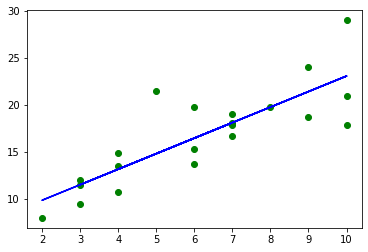

In [82]:
plt.scatter(x=data['Sorting_Time'],y=data['Delivery_Time'],color='green');plt.plot(data['Sorting_Time'],predi,color='blue')